In [ ]:
# Dataset: https://dev.socrata.com/foundry/data.cityofchicago.org/85ca-t3if

Grabbing data via Socrata

In [3]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd

In [6]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("85ca-t3if", limit = 100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [ ]:
results_df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,crash_date_est_i,statements_taken_i,private_property_i,photos_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,lane_cnt,rd_no
0,eb4a71053c75c41534eb923bc59d42ba3ec3fe96e74646...,2022-11-30T01:55:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b30788d5cc035283261b4471102f818beca92257ff11ac...,2022-11-30T01:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,298b26859c287c47fa42ed73e2a17eb75c1b59bd1631e2...,2022-11-30T01:00:00.000,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,UNKNOWN,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51b483cf4b8117c5a78809d7fbe127e5dee707d842c54a...,2022-11-30T00:25:00.000,40,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,OTHER,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e27f68f92f9b1b1e4568d0194338fcf3d942063252e940...,2022-11-29T23:10:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,"CURVE, LEVEL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,e846e86985b24d9cf3fe0d4cb70c9b0411c9247cd9bafb...,2021-12-26T20:42:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JE489579
99996,f71c9e6e8c5ac6a543c707577f24d3092147785e5ccd1f...,2021-12-26T20:34:00.000,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JE489593
99997,ba0b3d7def8fdb93ef5b0d8c2799b8f3fb6f91c6bd2179...,2021-12-26T20:34:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DARKNESS,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JE489580
99998,7f41366e7cd8e6aaf05a1b836cf5f145b138c3c7568b4e...,2021-12-26T20:30:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JE490147


In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_record_id                100000 non-null  object
 1   crash_date                     100000 non-null  object
 2   posted_speed_limit             100000 non-null  object
 3   traffic_control_device         100000 non-null  object
 4   device_condition               100000 non-null  object
 5   weather_condition              100000 non-null  object
 6   lighting_condition             100000 non-null  object
 7   first_crash_type               100000 non-null  object
 8   trafficway_type                100000 non-null  object
 9   alignment                      100000 non-null  object
 10  roadway_surface_cond           100000 non-null  object
 11  road_defect                    100000 non-null  object
 12  report_type                    96501 non-null

In [ ]:
df_clean = results_df.drop(columns = ['rd_no', 'crash_date_est_i', 'lane_cnt', 'hit_and_run_i', 'intersection_related_i', 'photos_taken_i', 'statements_taken_i', 'dooring_i', 'work_zone_i', 'work_zone_type', 'workers_present_i', 'private_property_i'])
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95386 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                95386 non-null  object
 1   crash_date                     95386 non-null  object
 2   posted_speed_limit             95386 non-null  object
 3   traffic_control_device         95386 non-null  object
 4   device_condition               95386 non-null  object
 5   weather_condition              95386 non-null  object
 6   lighting_condition             95386 non-null  object
 7   first_crash_type               95386 non-null  object
 8   trafficway_type                95386 non-null  object
 9   alignment                      95386 non-null  object
 10  roadway_surface_cond           95386 non-null  object
 11  road_defect                    95386 non-null  object
 12  report_type                    95386 non-null  object
 13  c

**Grabbing data via API endpoint**

In [ ]:
df = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv')
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674260,b93c225fa3fab962a186c30a442c0d581e03dbfa47cf99...,NaN,NaN,11/24/2022 04:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,...,0.0,0.0,4.0,0.0,16,5,11,41.821258,-87.701873,POINT (-87.701872610186 41.821258423603)
674261,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,NaN,NaN,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,15,5,11,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
674262,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,NaN,NaN,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,13,5,11,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
674263,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,NaN,NaN,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,6,5,11,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95386 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                95386 non-null  object
 1   crash_date                     95386 non-null  object
 2   posted_speed_limit             95386 non-null  object
 3   traffic_control_device         95386 non-null  object
 4   device_condition               95386 non-null  object
 5   weather_condition              95386 non-null  object
 6   lighting_condition             95386 non-null  object
 7   first_crash_type               95386 non-null  object
 8   trafficway_type                95386 non-null  object
 9   alignment                      95386 non-null  object
 10  roadway_surface_cond           95386 non-null  object
 11  road_defect                    95386 non-null  object
 12  report_type                    95386 non-null  object
 13  c

In [ ]:
df_clean2 = df.drop(columns = ['RD_NO', 'CRASH_DATE_EST_I', 'LANE_CNT', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'])
df_clean2 = df_clean2.dropna()
df_clean2 = df_clean2[(df_clean2.LATITUDE > 0) & (df_clean2.LATITUDE > 0)]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650419 entries, 0 to 674264
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                650419 non-null  object 
 1   CRASH_DATE                     650419 non-null  object 
 2   POSTED_SPEED_LIMIT             650419 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         650419 non-null  object 
 4   DEVICE_CONDITION               650419 non-null  object 
 5   WEATHER_CONDITION              650419 non-null  object 
 6   LIGHTING_CONDITION             650419 non-null  object 
 7   FIRST_CRASH_TYPE               650419 non-null  object 
 8   TRAFFICWAY_TYPE                650419 non-null  object 
 9   ALIGNMENT                      650419 non-null  object 
 10  ROADWAY_SURFACE_COND           650419 non-null  object 
 11  ROAD_DEFECT                    650419 non-null  object 
 12  REPORT_TYPE                   

**DATA VISUALIZATIONS BELOW**

In [ ]:
print('Total Number of Reported Crashes:', df_clean['crash_record_id'].nunique())

Total Number of Reported Crashes: 95386


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')

In [ ]:
df_clean2['CRASH_DATE'] = pd.to_datetime(df_clean2['CRASH_DATE'])

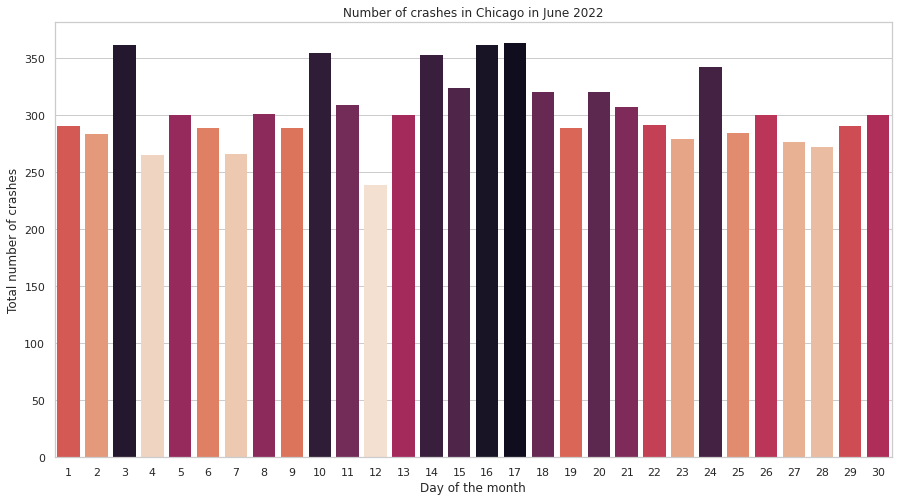

In [ ]:
df_clean2['Day'] = df_clean2['CRASH_DATE'].dt.day
df_clean2=df_clean2[((df_clean2['CRASH_DATE'].dt.month==6) & (df_clean2['CRASH_DATE'].dt.year==2022))]
plt.figure(figsize=(15,8))
sns.set(style="whitegrid", color_codes=True)
data = df_clean2.groupby('Day')['CRASH_RECORD_ID'].size()
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank], linewidth =0)
plt.title('Number of crashes in Chicago in June 2022')
plt.xlabel('Day of the month')
plt.ylabel('Total number of crashes')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
%matplotlib notebook

In [ ]:
#Some sample queries

# speedBelow20 = requests.get("https://data.cityofchicago.org/resource/85ca-t3if.json?$where=crash_date between '2022-01-01T14:00:00' and '2022-11-24T14:00:00' AND posted_speed_limit between 0 and 20 &$limit=100000").json()
# speedBewteen20And40 = requests.get("https://data.cityofchicago.org/resource/85ca-t3if.json?$where=crash_date between '2022-01-01T14:00:00' and '2022-11-24T14:00:00' AND posted_speed_limit between 20 and 40 &$limit=100000").json()
# speedBewteen40And60 = requests.get("https://data.cityofchicago.org/resource/85ca-t3if.json?$where=crash_date between '2022-01-01T14:00:00' and '2022-11-24T14:00:00' AND posted_speed_limit between 40 and 60 &$limit=100000").json()
# speedAbove60 = requests.get("https://data.cityofchicago.org/resource/85ca-t3if.json?$where=crash_date between '2022-01-01T14:00:00' and '2022-11-24T14:00:00' AND posted_speed_limit > 60 &$limit=100000").json()

In [ ]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9117 entries, 194 to 672540
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                9117 non-null   object        
 1   CRASH_DATE                     9117 non-null   datetime64[ns]
 2   POSTED_SPEED_LIMIT             9117 non-null   int64         
 3   TRAFFIC_CONTROL_DEVICE         9117 non-null   object        
 4   DEVICE_CONDITION               9117 non-null   object        
 5   WEATHER_CONDITION              9117 non-null   object        
 6   LIGHTING_CONDITION             9117 non-null   object        
 7   FIRST_CRASH_TYPE               9117 non-null   object        
 8   TRAFFICWAY_TYPE                9117 non-null   object        
 9   ALIGNMENT                      9117 non-null   object        
 10  ROADWAY_SURFACE_COND           9117 non-null   object        
 11  ROAD_DEFECT  

In [ ]:
sub1 = df_clean2[['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
   'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']]
sub1

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE
194,NO CONTROLS,CLEAR,DAYLIGHT,IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
460,UNKNOWN,CLEAR,DAYLIGHT,UNABLE TO DETERMINE,UNABLE TO DETERMINE
492,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRIVING ON WRONG SIDE/WRONG WAY,UNABLE TO DETERMINE
575,NO CONTROLS,CLEAR,DAYLIGHT,IMPROPER BACKING,UNABLE TO DETERMINE
605,UNKNOWN,CLEAR,DAYLIGHT,FOLLOWING TOO CLOSELY,IMPROPER LANE USAGE
...,...,...,...,...,...
648084,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PHYSICAL CONDITION OF DRIVER,UNABLE TO DETERMINE
648102,NO CONTROLS,UNKNOWN,UNKNOWN,UNABLE TO DETERMINE,NOT APPLICABLE
655371,NO CONTROLS,UNKNOWN,DAYLIGHT,UNABLE TO DETERMINE,UNABLE TO DETERMINE
665050,UNKNOWN,UNKNOWN,DAYLIGHT,UNABLE TO DETERMINE,UNABLE TO DETERMINE


In [ ]:
df_clean2['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 3817
FAILING TO YIELD RIGHT-OF-WAY                                                       1002
FOLLOWING TOO CLOSELY                                                                829
IMPROPER OVERTAKING/PASSING                                                          510
NOT APPLICABLE                                                                       424
IMPROPER BACKING                                                                     348
FAILING TO REDUCE SPEED TO AVOID CRASH                                               344
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  326
IMPROPER LANE USAGE                                                                  306
IMPROPER TURNING/NO SIGNAL                                                           302
DISREGARDING TRAFFIC SIGNALS                                                         186
OPERATING VEHICLE IN 

In [ ]:
sub1.drop(sub1[sub1.PRIM_CONTRIBUTORY_CAUSE == 'UNABLE TO DETERMINE'].index, inplace=True)
sub1.drop(sub1[sub1.PRIM_CONTRIBUTORY_CAUSE == 'NOT APPLICABLE'].index, inplace=True)
sub1['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


FAILING TO YIELD RIGHT-OF-WAY                                                       1002
FOLLOWING TOO CLOSELY                                                                829
IMPROPER OVERTAKING/PASSING                                                          510
IMPROPER BACKING                                                                     348
FAILING TO REDUCE SPEED TO AVOID CRASH                                               344
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  326
IMPROPER LANE USAGE                                                                  306
IMPROPER TURNING/NO SIGNAL                                                           302
DISREGARDING TRAFFIC SIGNALS                                                         186
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     115
DISREGARDING STOP SIGN                                                                82
DISTRACTION - FROM IN

In [ ]:
prim_cause_df = (sub1.groupby(["PRIM_CONTRIBUTORY_CAUSE"]).size().reset_index(name="Counts").sort_values(by=["PRIM_CONTRIBUTORY_CAUSE"]))
prim_cause_df

,PRIM_CONTRIBUTORY_CAUSE,Counts
0,ANIMAL,9
1,CELL PHONE USE OTHER THAN TEXTING,12
2,DISREGARDING OTHER TRAFFIC SIGNS,20
3,DISREGARDING ROAD MARKINGS,8
4,DISREGARDING STOP SIGN,82
5,DISREGARDING TRAFFIC SIGNALS,186
6,DISREGARDING YIELD SIGN,7
7,DISTRACTION - FROM INSIDE VEHICLE,65
8,DISTRACTION - FROM OUTSIDE VEHICLE,40
9,DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGAT...,3


In [ ]:
import plotly.graph_objects as go
## Creating a pie chart
# create labels using all unique values in the column named "population"
labels = prim_cause_df["PRIM_CONTRIBUTORY_CAUSE"].unique()
# group by count of the "population" column.
values = prim_cause_df["Counts"]

# defining the actual figure using the dimension: population
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,            
        )
    ]
)
# Update layout to show a title
# fig.update_layout(title_text="Primary Causes of Crashes", width=1000, height=500, font=dict(size=8))

fig.update_traces(hole=0.4)

fig.update_layout(
    width=1000,
    height=600,
    title=dict(
        text='<b>Primary Causes of Crashes</b>',
        font=dict(
            family="Arial",
            size=20,
            color='#000000'
        )
    ),
    font=dict(
        family="Arial",
        size=8,
        color='#000000'
    )
)
# display the figure
fig.show()

In [ ]:
df_time = df_clean2[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK']].copy()

df_time['DAY_OF_WEEK'] = 'EMPTY'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 1), 'DAY_OF_WEEK'] = 'Monday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 2), 'DAY_OF_WEEK'] = 'Tuesday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 3), 'DAY_OF_WEEK'] = 'Wednesday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 4), 'DAY_OF_WEEK'] = 'Thursday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 5), 'DAY_OF_WEEK'] = 'Friday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 6), 'DAY_OF_WEEK'] = 'Saturday'
df_time.loc[(df_time['CRASH_DAY_OF_WEEK'] == 7), 'DAY_OF_WEEK'] = 'Sunday'

df_time = df_time.groupby(['DAY_OF_WEEK', 'CRASH_HOUR']).size().reset_index(name = 'Counts')
fig = go.Figure(data = go.Heatmap(
    z = df_time.Counts,
    x = df_time.DAY_OF_WEEK,
    y = df_time.CRASH_HOUR,
))

fig.update_xaxes(categoryorder = 'array', categoryarray = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig.update_layout(
    title = 'Crashes via Time of Day & Day of Week',
    xaxis_title = "Day of the Week",
    yaxis_title = "Hours",
)

fig.show()

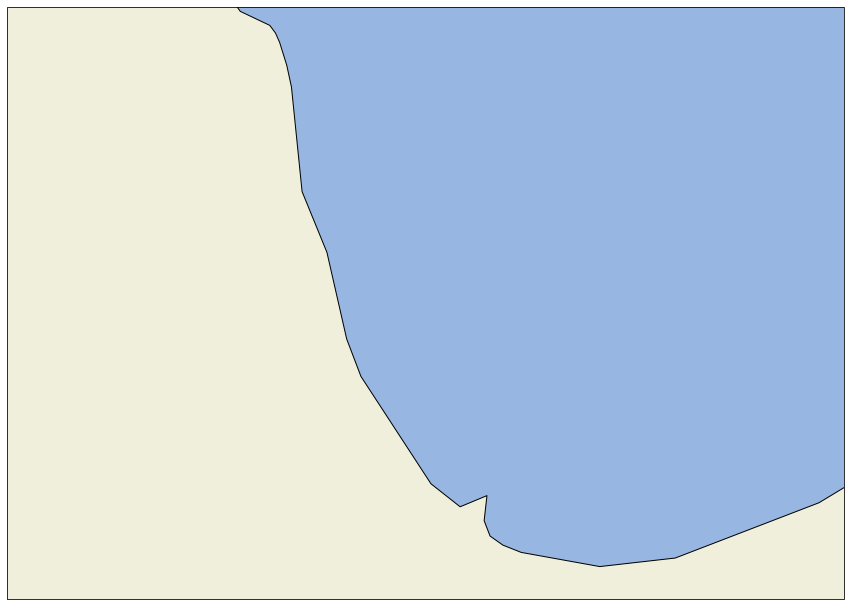

In [9]:
#!pip install cartopy
# !pip uninstall shapely
# !pip install shapely --no-binary shapely 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs
import cartopy
from sodapy import Socrata
#df2 = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv')
#df2

client = Socrata("data.cityofchicago.org", None)
results = client.get("85ca-t3if", limit=10000)
results_df = pd.DataFrame.from_records(results)
# df_clean = results_df.dropna()
df_clean=results_df.dropna(subset=['latitude', 'longitude'])
#df_clean.info()

extent = [-87, -88, 41.6, 42.1]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(15, 15))
ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

plt.scatter(x=df_clean.longitude, y=df_clean.latitude, 
            color="brown", s=5, transform=crs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')

plt.show()